+-.-High Rating Google Play store Prediction 

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

In [ ]:
data=pd.read_csv('googleplaystore.csv.csv')

In [ ]:
data.info

<bound method DataFrame.info of                                                      App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Var

In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
 data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#percentage of missing data 
total=data.isnull().sum().sort_values(ascending=False)
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
misssing_data = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])        
misssing_data.head(6)                                                                  

,Total,Percentage
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [ ]:
#In the above information there is <= 1% of missing value so i decided it will not affect our data.

#so I drop it

In [ ]:
data.dropna(inplace=True)

Data visualization and its relations

Rating:

Text(0.5, 1.0, 'Distribution of Rating')

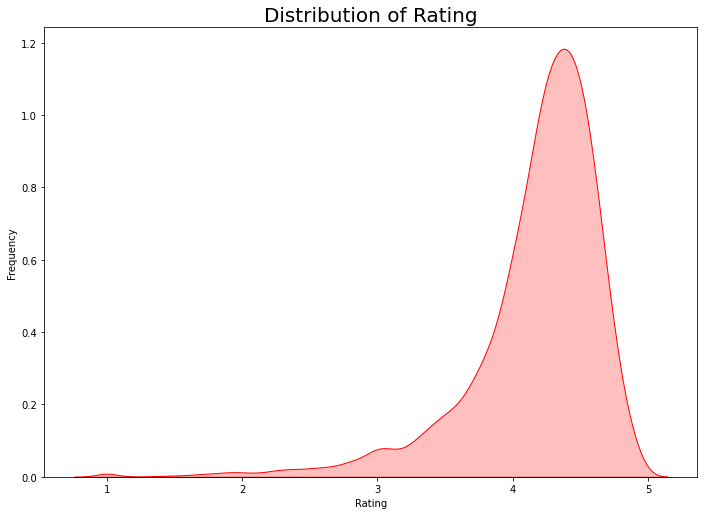

In [ ]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating[data.Rating <5], color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [ ]:
data['Rating'].skew()

-1.8501346146929738

In [ ]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

AVg of rating is 4.2

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

App:

In [ ]:
data['App'].nunique()

8190

App is like App name but App name is not created more impact of our model so i dropped it.

In [ ]:
data.drop('App',axis=1,inplace=True)

In [ ]:
data['Category'].nunique()

33

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

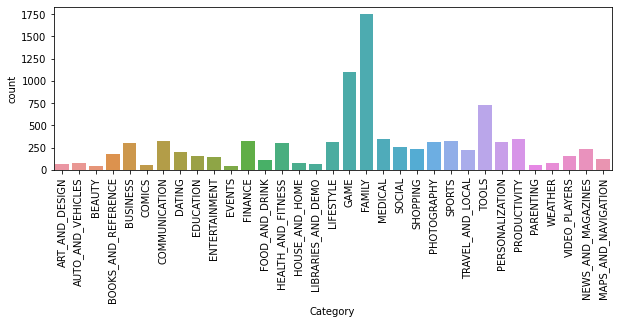

In [ ]:
#34 unique category found , to find no. of count in each category
fig,(axis1) =plt.subplots(1,1,figsize=(10,3))
sns.countplot('Category',data=data)
plt.xticks(rotation=90)

In graph says most of the category created in **Family & Game** 

In [ ]:
data['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

<Figure size 72x720 with 0 Axes>

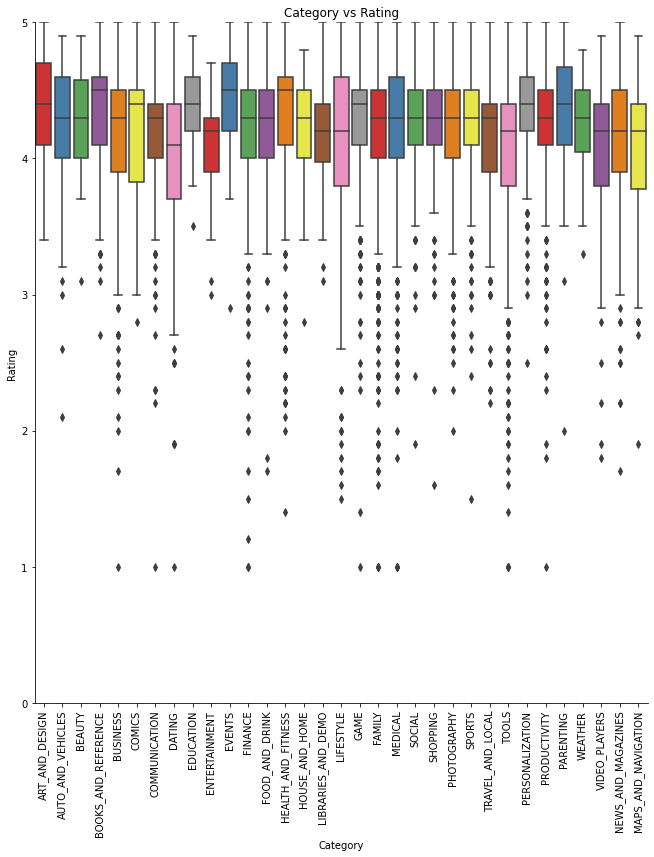

In [ ]:
plt.figure(figsize=(1,10))
sns.catplot('Category','Rating',data=data,kind='box',palette='Set1',height=10)
plt.ylim(0, 5)
plt.title('Category vs Rating')
plt.xticks(rotation=90)

Rating of each category is not much different found

Reviews:

In [ ]:
data['Reviews'].dtypes

dtype('O')

In [ ]:
data['Reviews'].value_counts()

2        83
3        78
4        74
5        74
1        67
         ..
28390     1
72065     1
2076      1
80119     1
29839     1
Name: Reviews, Length: 5990, dtype: int64

In [ ]:
data['Reviews'].describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

Million review occurs only one time  in this Dataframe so i removed that row 

In [ ]:
data['Reviews']=data['Reviews'].apply(lambda x : int(x))

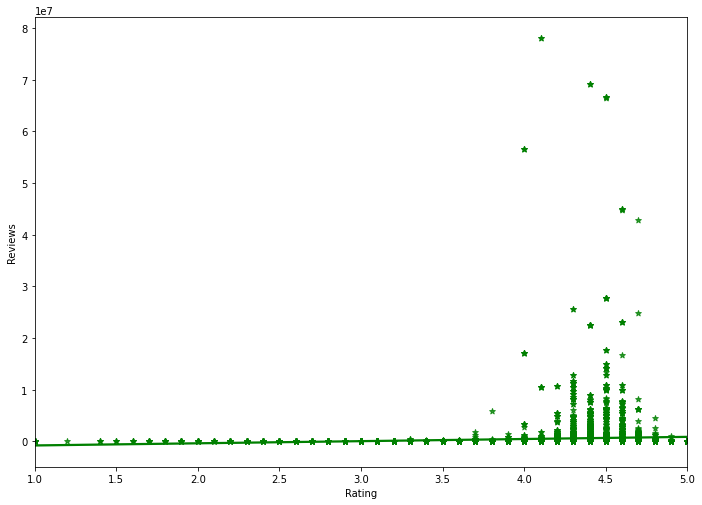

In [ ]:
sns.regplot(x='Rating',y='Reviews',data=data,color='Green',marker='*')

In this graph show high no. of rating app gets high no. reviews 

Size:

In [ ]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
data['Size'].nunique()

413

In [ ]:
data['Size'].tail(5)

10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

In size column we found ***varies with device*** so we convert to int



In [ ]:
def encod(x):
  if x=='Varies with device':
    return 1
  else:
    return x

In [ ]:
data['Size']=data['Size'].apply(encod)

In [ ]:
#In this size data mentioned in M & K (string) so convert to int

In [ ]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

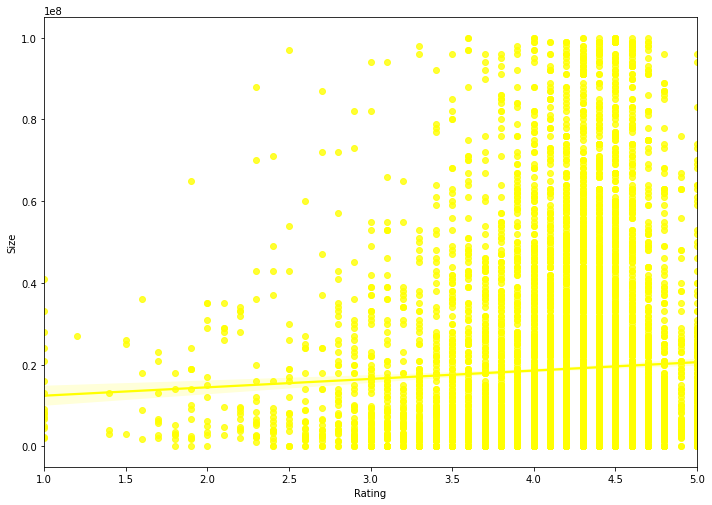

In [ ]:
sns.regplot(x='Rating',y='Size',data=data,color='Yellow',marker='o')

This graph show when the size of the app increase rating also get increased but we should not take any conclusion for this information. 

Install:

In [ ]:
data['Installs'].head(5)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Installs parameter in int but it stored as object. 
so convert object to int

In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
data['Installs'].nunique()

19

In [ ]:
data.sort_values('Installs',ascending=False,inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,COMMUNICATION,4.2,10790289,1.0,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
1,GAME,4.3,8118937,62000000.0,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
2,GAME,4.5,14891223,1.0,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3,PRODUCTIVITY,4.2,858230,1.0,"500,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
4,GAME,4.3,8118937,62000000.0,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

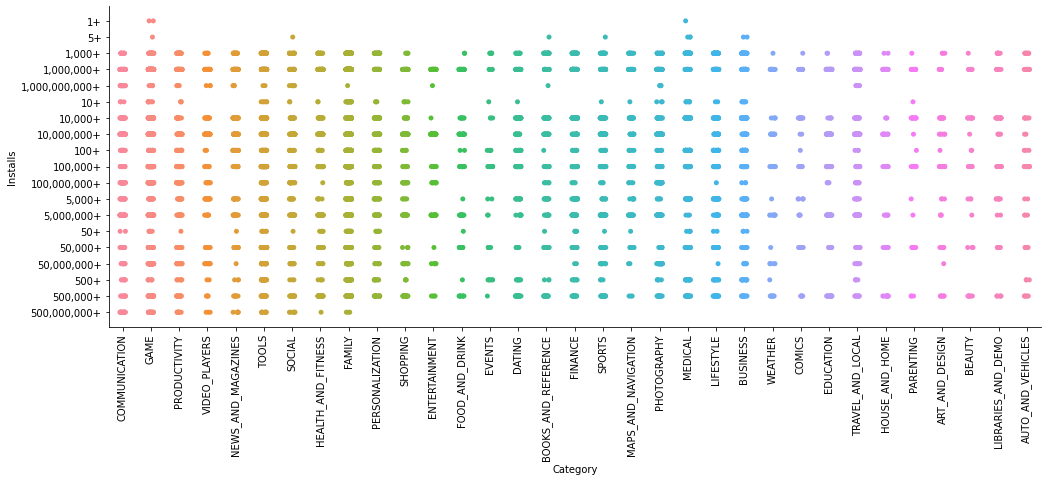

In [ ]:
sns.catplot('Category','Installs',data=data,height=5,aspect=3)
plt.xticks(rotation=90)

All categories are  equally shared.
 

In [ ]:
# install in object data so convert int

data['Installs']=data['Installs'].apply(lambda x: x.replace('+',''))
data['Installs']=data['Installs'].apply(lambda x: x.replace(',',''))
data['Installs']=data['Installs'].apply(lambda x: int(x))

#In integer or float values doesn't contain (,) & (+) so i replaced

In [ ]:
data['Installs'].dtypes

dtype('int64')

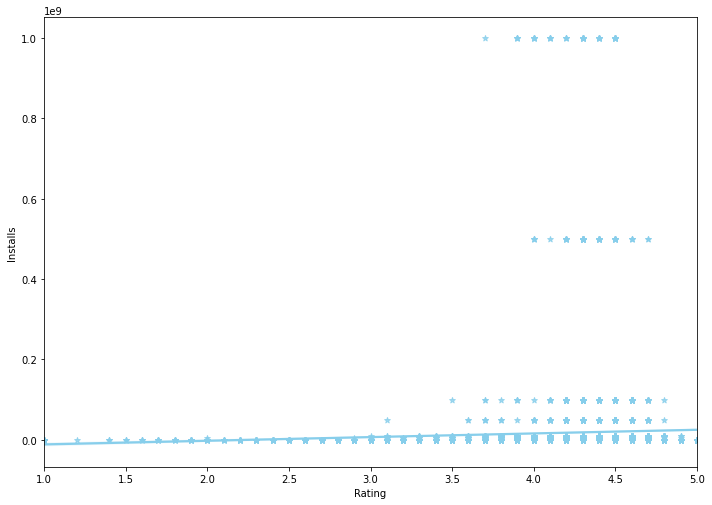

In [ ]:
sns.regplot(x='Rating',y='Installs',data=data,color='Skyblue',marker='*')

Its show high no. of installing app having high rating 





Price:

In [ ]:
data['Price'].value_counts().head()

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [ ]:
data['Price'].unique()

array(['0', '$3.99', '$1.99', '$2.99', '$5.99', '$2.49', '$0.99', '$4.99',
       '$2.00', '$8.99', '$1.49', '$17.99', '$4.49', '$3.49', '$15.99',
       '$399.99', '$4.77', '$11.99', '$29.99', '$9.99', '$19.99', '$1.76',
       '$1.75', '$14.99', '$4.60', '$1.00', '$6.99', '$7.99', '$13.99',
       '$2.90', '$3.95', '$24.99', '$9.00', '$6.49', '$4.59', '$12.99',
       '$39.99', '$3.88', '$14.00', '$3.02', '$16.99', '$1.20', '$3.90',
       '$1.97', '$2.95', '$5.49', '$3.28', '$10.00', '$2.50', '$2.59',
       '$1.59', '$389.99', '$299.99', '$400.00', '$18.99', '$3.04',
       '$10.99', '$4.29', '$37.99', '$379.99', '$4.84', '$19.40', '$1.50',
       '$7.49', '$33.99', '$79.99', '$2.56', '$1.70', '$1.29', '$1.61',
       '$15.46', '$3.08', '$8.49'], dtype=object)

In [ ]:
data['Price']=data['Price'].apply(lambda x: x.replace('$',''))
data['Price']=data['Price'].apply(lambda x: float(x))

In [ ]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In this data says Max no. of app is freee

Max price of app is 400

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

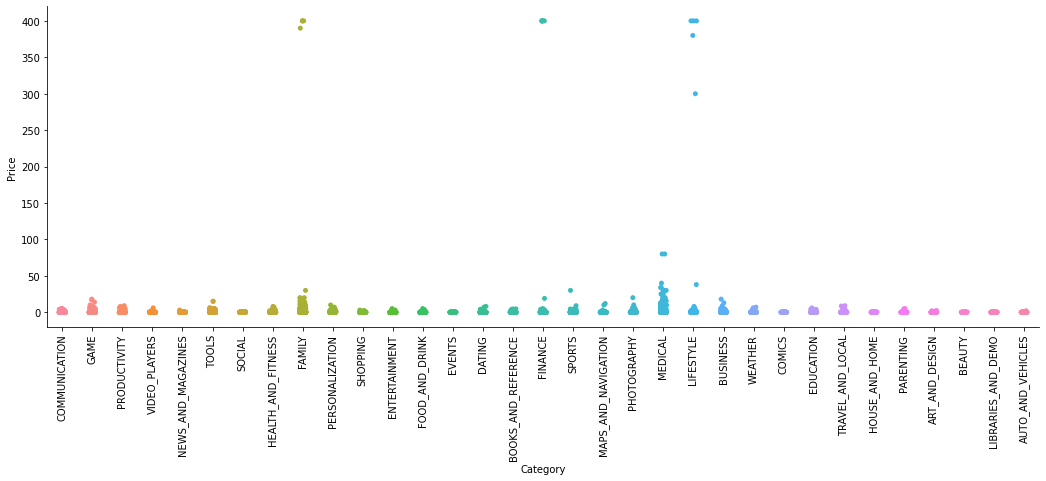

In [ ]:
sns.catplot('Category','Price',data=data,height=5,aspect=3)
plt.xticks(rotation=90)

category also doesn't play a major role for price fixing

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text major ticklabel objects>)

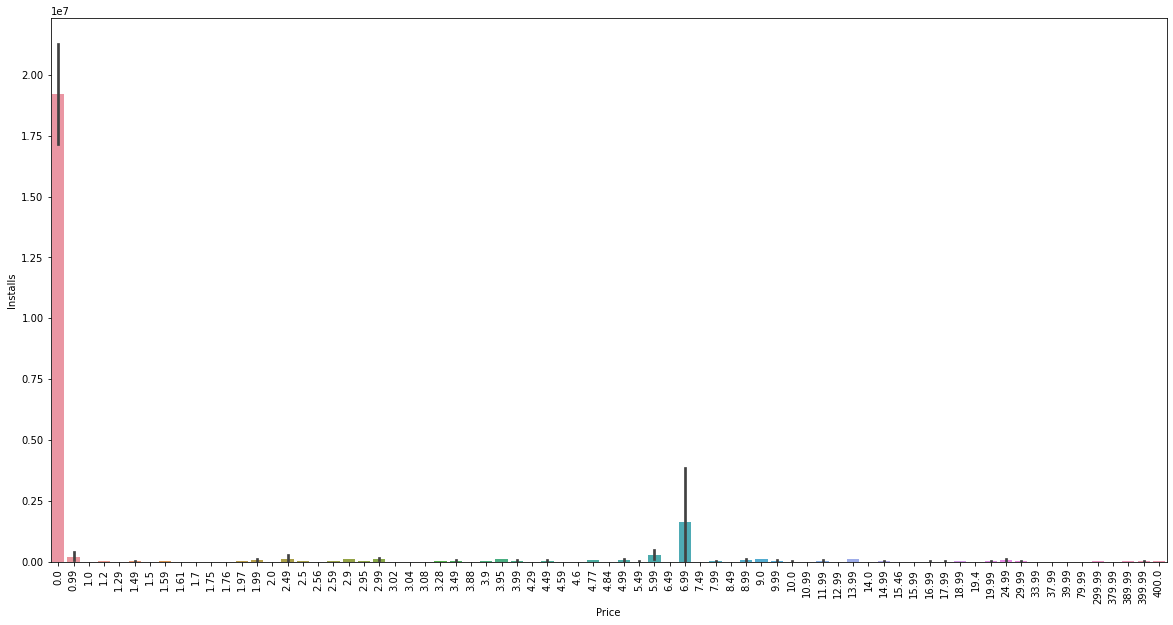

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot('Price','Installs',data=data)
plt.xticks(rotation=90)

Most people prefer Free app,this bar plot shows clearly

In [ ]:
def enco(x): 
  if x==0.0:
    return 0
  else:
    return 1

In [ ]:
data['Price']=data['Price'].apply(enco)

In [ ]:
data['Price'].unique()

array([0, 1])

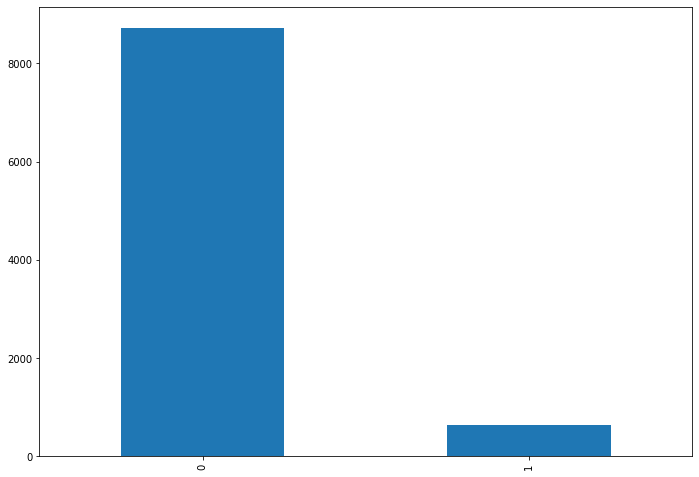

In [ ]:
data['Price'].value_counts().plot(kind='bar')

Type:

In [ ]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
data['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

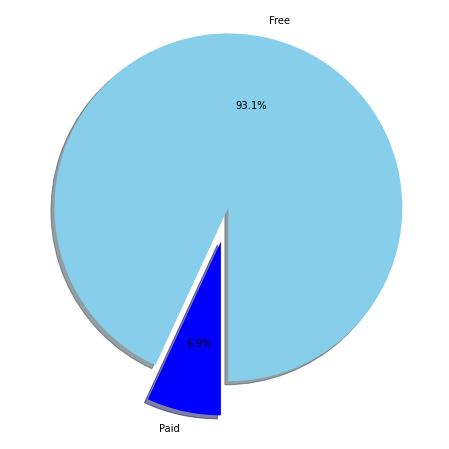

In [ ]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["skyblue","Blue"]
explode = (0.1,0.1) 
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)
plt.show()

In this Pie Chart show lot of app in free type

In [ ]:
def code(x):
  if  x=='Free':
    return 0
  else:
    return 1

In [ ]:
data['Type']=data['Type'].apply(code)

In [ ]:
data['Type']=data['Type'].apply(lambda x: int(x))

Content Rating:

In [ ]:
data['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

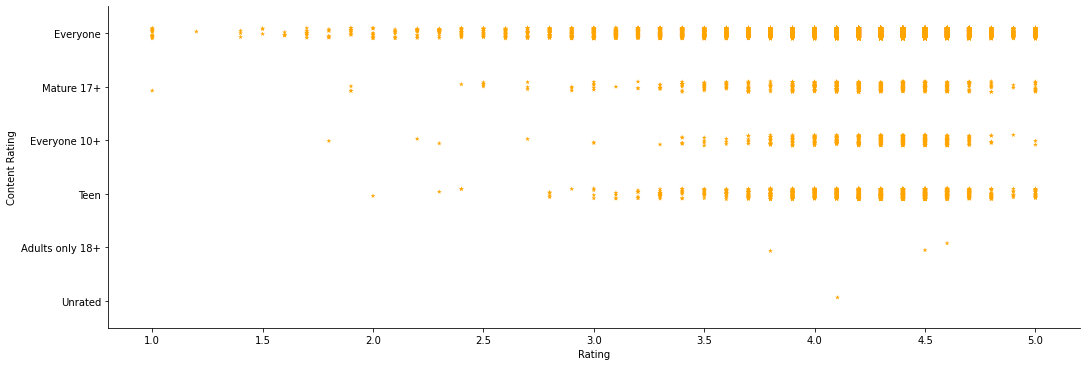

In [ ]:
sns.catplot(x='Rating',y='Content Rating',data=data,color='Orange',marker='*',height=5,aspect=3)

Everyone feature gives more content rating

In [ ]:
data = pd.get_dummies(data, columns= ["Content Rating"])

Genres:

In [ ]:
data['Genres'].unique()

array(['Communication', 'Action', 'Casual', 'Productivity',
       'Video Players & Editors', 'News & Magazines', 'Tools', 'Social',
       'Health & Fitness', 'Personalization', 'Shopping',
       'Educational;Education', 'Entertainment', 'Education;Pretend Play',
       'Food & Drink', 'Events', 'Communication;Creativity', 'Adventure',
       'Dating', 'Board', 'Puzzle;Brain Games', 'Books & Reference',
       'Finance', 'Simulation', 'Education', 'Education;Education',
       'Role Playing', 'Puzzle', 'Sports', 'Maps & Navigation',
       'Photography', 'Medical', 'Music & Audio;Music & Video',
       'Entertainment;Music & Video', 'Casual;Brain Games', 'Lifestyle',
       'Simulation;Education', 'Racing', 'Casino', 'Business',
       'Education;Creativity', 'Art & Design;Pretend Play', 'Educational',
       'Weather', 'Comics', 'Arcade', 'Racing;Action & Adventure',
       'Arcade;Action & Adventure', 'Puzzle;Creativity',
       'Educational;Brain Games', 'Travel & Local', 'Card',


In [ ]:
data['Genres'].nunique()

115

In [ ]:
data['Genres']=data['Genres'].str.split(';').str[0]

In [ ]:
data['Genres'].unique()

array(['Communication', 'Action', 'Casual', 'Productivity',
       'Video Players & Editors', 'News & Magazines', 'Tools', 'Social',
       'Health & Fitness', 'Personalization', 'Shopping', 'Educational',
       'Entertainment', 'Education', 'Food & Drink', 'Events',
       'Adventure', 'Dating', 'Board', 'Puzzle', 'Books & Reference',
       'Finance', 'Simulation', 'Role Playing', 'Sports',
       'Maps & Navigation', 'Photography', 'Medical', 'Music & Audio',
       'Lifestyle', 'Racing', 'Casino', 'Business', 'Art & Design',
       'Weather', 'Comics', 'Arcade', 'Travel & Local', 'Card',
       'House & Home', 'Strategy', 'Parenting', 'Beauty', 'Music',
       'Libraries & Demo', 'Trivia', 'Auto & Vehicles', 'Word'],
      dtype=object)

In [ ]:
data['Genres'].nunique()

48

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

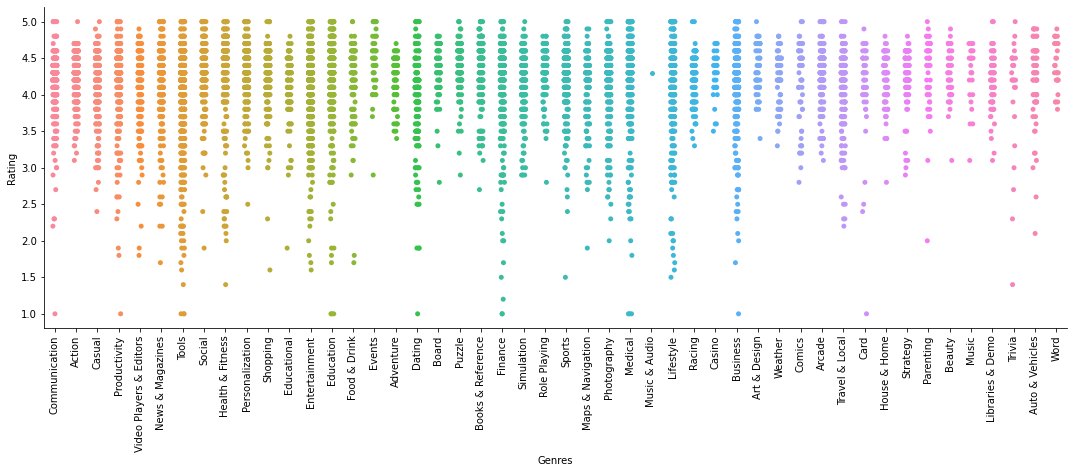

In [ ]:
sns.catplot(x='Genres',y='Rating',data=data,height=5,aspect=3)
plt.xticks(rotation=90)

mostly rating equally splitted in each genres. 

Last Updated:

In [ ]:
data['new']=pd.to_datetime(data['Last Updated'])

In [ ]:
data['new'].describe()

count                    9360
unique                   1299
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [ ]:
data['new'].max()

Timestamp('2018-08-08 00:00:00')

In [ ]:
data['new']-data['new'].max()

0       -13 days
1       -34 days
2       -20 days
3        -2 days
4       -34 days
          ...   
9355   -131 days
9356   -855 days
9357     -6 days
9358   -523 days
9359   -546 days
Name: new, Length: 9360, dtype: timedelta64[ns]

In [ ]:
data['Last Updated']=(data['new']-data['new'].max()).dt.days

In [ ]:
data['Last Updated'].head()

0   -13
1   -34
2   -20
3    -2
4   -34
Name: Last Updated, dtype: int64

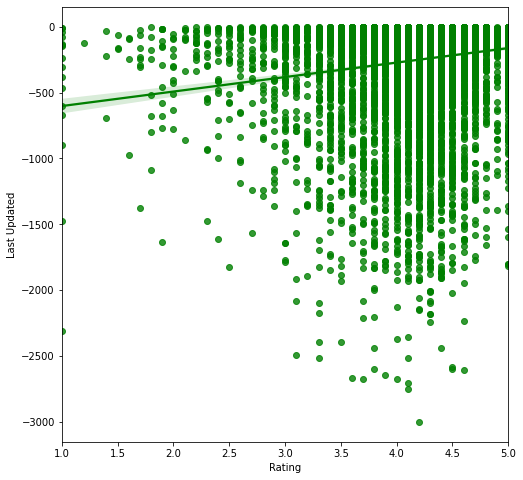

In [ ]:
sns.regplot(x='Rating',y='Last Updated',data=data,color='Green',marker='o')

In [ ]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,new
0,COMMUNICATION,4.2,10790289,1.0,500000000,0,0,Communication,-13,Varies with device,Varies with device,0,1,0,0,0,0,2018-07-26
1,GAME,4.3,8118937,62000000.0,500000000,0,0,Action,-34,1.49.1,4.0 and up,0,1,0,0,0,0,2018-07-05
2,GAME,4.5,14891223,1.0,500000000,0,0,Casual,-20,4.8.0.132,4.1 and up,0,1,0,0,0,0,2018-07-19
3,PRODUCTIVITY,4.2,858230,1.0,500000000,0,0,Productivity,-2,Varies with device,Varies with device,0,1,0,0,0,0,2018-08-06
4,GAME,4.3,8118937,62000000.0,500000000,0,0,Action,-34,1.49.1,4.0 and up,0,1,0,0,0,0,2018-07-05


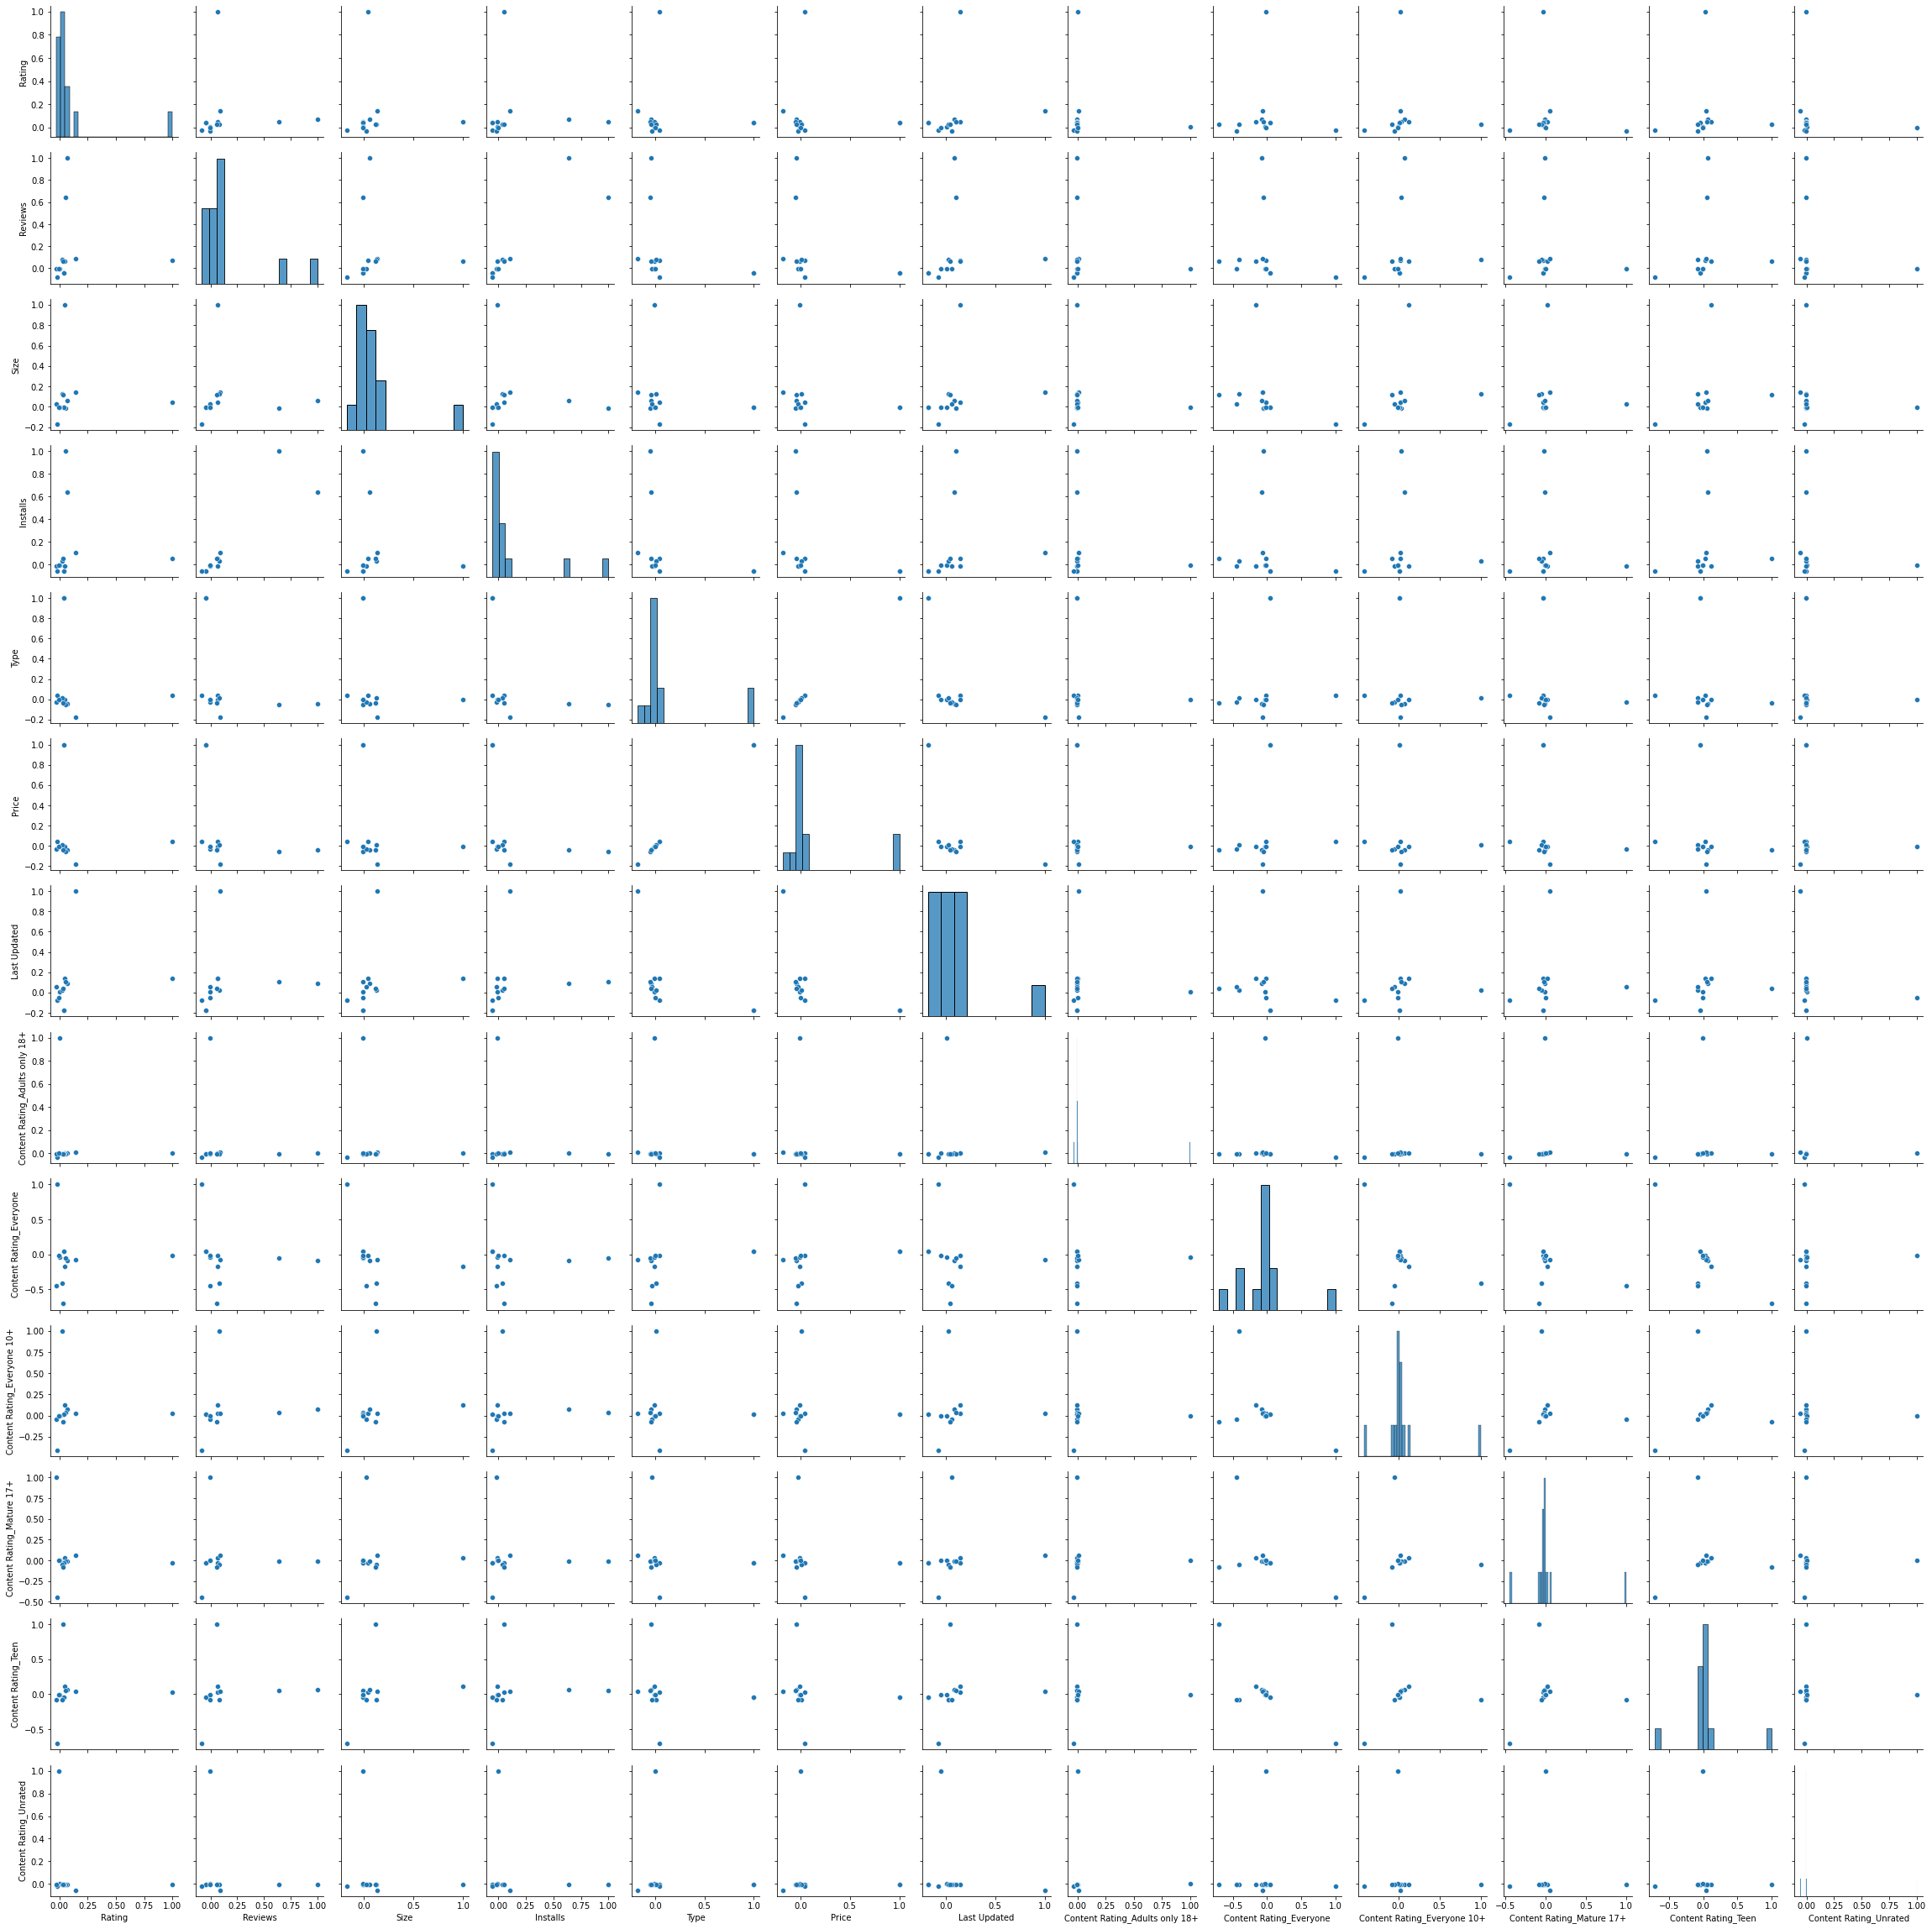

In [ ]:
corr=data.corr()
sns.pairplot(corr)

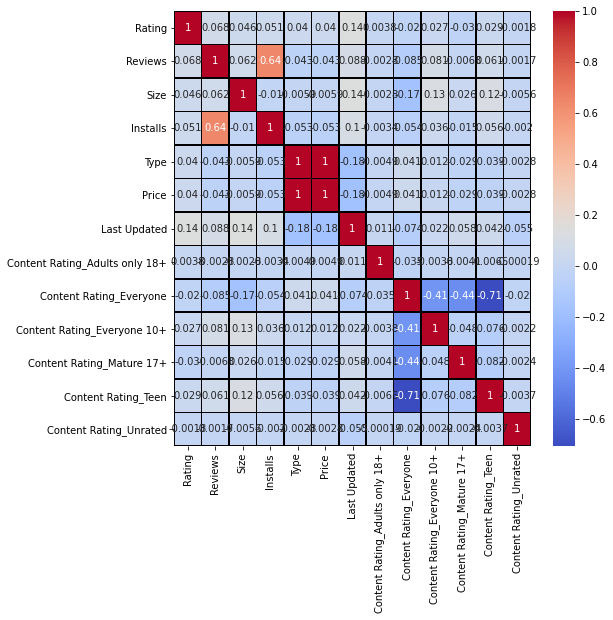

In [ ]:
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidth=0.5,linecolor='black')

In this heatmap type and price both are highly co-related so i dropped one feature.

In [ ]:
data.drop('Type',axis=1,inplace=True)


In [ ]:
data.drop('Current Ver',axis=1,inplace=True)
data.drop('Android Ver',axis=1,inplace=True)

current ver & Android ver not required for any purpose so i dropped it

In [ ]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,new
0,COMMUNICATION,4.2,10790289,1.0,500000000,0,Communication,-13,0,1,0,0,0,0,2018-07-26
1,GAME,4.3,8118937,62000000.0,500000000,0,Action,-34,0,1,0,0,0,0,2018-07-05
2,GAME,4.5,14891223,1.0,500000000,0,Casual,-20,0,1,0,0,0,0,2018-07-19
3,PRODUCTIVITY,4.2,858230,1.0,500000000,0,Productivity,-2,0,1,0,0,0,0,2018-08-06
4,GAME,4.3,8118937,62000000.0,500000000,0,Action,-34,0,1,0,0,0,0,2018-07-05


In my point of view Genres are sub-split of category so i dropped it



In [ ]:
data.drop('new',axis=1,inplace=True)

In [ ]:
data.drop('Genres',axis=1,inplace=True)

Feature Engineering:

In [ ]:
categorical_feature=data.select_dtypes(exclude=[np.number])

In [ ]:
for feature in categorical_feature:
  label_code=data.groupby([feature])['Rating'].mean().sort_values().index
  label_code={k:i for i,k in enumerate(label_code,0)}
  data[feature]=data[feature].map(label_code)


In [ ]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Last Updated,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,11,4.2,10790289,1.0,500000000,0,-13,0,1,0,0,0,0
1,26,4.3,8118937,62000000.0,500000000,0,-34,0,1,0,0,0,0
2,26,4.5,14891223,1.0,500000000,0,-20,0,1,0,0,0,0
3,19,4.2,858230,1.0,500000000,0,-2,0,1,0,0,0,0
4,26,4.3,8118937,62000000.0,500000000,0,-34,0,1,0,0,0,0


Feature scaling:

In [ ]:
feature_scale=[feature for feature in data.columns if feature not in ['Rating']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Normalize=MinMaxScaler()
Normalize.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
Normalize.transform(data[feature_scale])

array([[3.43750000e-01, 1.38056832e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.03878097e-01, 6.19999996e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.90526419e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.37500000e-01, 3.83836369e-08, 2.49999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.27945456e-08, 1.59999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.27945456e-08, 1.99999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
data = pd.concat([data['Rating'].reset_index(drop=True),
                    pd.DataFrame(Normalize.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

,Rating,Category,Reviews,Size,Installs,Price,Last Updated,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.2,0.34375,0.138057,0.00,0.5,0.0,0.995668,0.0,1.0,0.0,0.0,0.0,0.0
1,4.3,0.81250,0.103878,0.62,0.5,0.0,0.988670,0.0,1.0,0.0,0.0,0.0,0.0
2,4.5,0.81250,0.190526,0.00,0.5,0.0,0.993336,0.0,1.0,0.0,0.0,0.0,0.0
3,4.2,0.59375,0.010981,0.00,0.5,0.0,0.999334,0.0,1.0,0.0,0.0,0.0,0.0
4,4.3,0.81250,0.103878,0.62,0.5,0.0,0.988670,0.0,1.0,0.0,0.0,0.0,0.0


Feature selection:

In [ ]:
#capture dependent variable
y=data[['Rating']]

In [ ]:
#drop dependent variable in given data
x=data.drop(['Rating'],axis=1)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold()
vt.fit(x)

VarianceThreshold(threshold=0.0)

In [ ]:
vt.transform(x)

array([[3.43750000e-01, 1.38056832e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.03878097e-01, 6.19999996e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.90526419e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.37500000e-01, 3.83836369e-08, 2.49999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.27945456e-08, 1.59999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12500000e-01, 1.27945456e-08, 1.99999992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Its shows given inputs are all wanted to predict the target 

Model Training:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x,y)

In [ ]:
algorithm=[]
score=[]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled, y_resampled)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr=LinearRegression()
lr.fit(x_train,y_train)
model1=lr.predict(x_test)

score.append(lr.score(x_test,y_test)*100)
algorithm.append('Linear regression')

print(lr.intercept_)
print(lr.coef_)
print('score:',lr.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,model1))
print('MAE:',mean_absolute_error(y_test,model1))

2.536777459858212
[ 0.93401171  1.31155887  0.12972101  1.54361354  0.31898238  0.61301133
  0.64720469 -0.48783443 -0.19747727 -0.09086616  0.12897316  0.        ]
score: 0.10240954113218292
MSE: 1.1518330577937412
MAE: 0.9090129568297197


bset alpha: 0.0
score: 0.10240996681886683
MSE: 1.151832511531256
MAE: 0.909012760673068


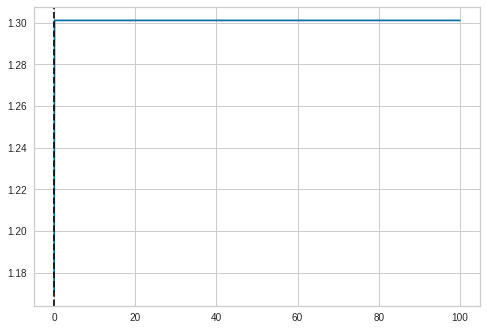

In [ ]:
#Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against

alphas=[10e-3,10e-2,0,10,10e1]
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(x_train,y_train)


lascv=LassoCV(alphas=alphas,normalize=False)
lascv.fit(x_train,y_train)
print('bset alpha:',lascv.alpha_)
las=Lasso(alpha=lascv.alpha_,normalize=False)
las.fit(x_train,y_train)

model2=las.predict(x_test)

score.append(las.score(x_test,y_test)*100)
algorithm.append('LasssoCV')

print('score:',las.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,model2))
print('MAE:',mean_absolute_error(y_test,model2))

bset alpha cv: 2.809451594981406
score: 0.10235792235702434
MSE: 1.1518992975927977
MAE: 0.9090953249186103


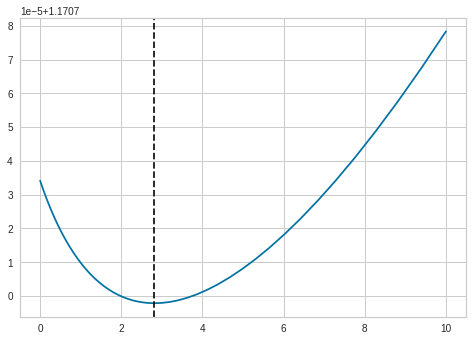

In [ ]:
#REidgecv
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against

alphas=np.logspace(-10, 1, 400)
# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(x_train,y_train)

ridcv=RidgeCV(alphas=alphas,normalize=False)
ridcv.fit(x_train,y_train)
print('bset alpha cv:',ridcv.alpha_)
rid=Ridge(alpha=ridcv.alpha_,normalize=False)
rid.fit(x_train,y_train)

model4=rid.fit(x_train,y_train)

y_pred_model4=model4.predict(x_test)

score.append(model4.score(x_test,y_test)*100)
algorithm.append('REidgecv')

print('score:',model4.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,y_pred_model4))
print('MAE:',mean_absolute_error(y_test,y_pred_model4))

In [ ]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
model5=Dt.predict(x_test)


score.append(Dt.score(x_test,y_test)*100)
algorithm.append(' Decision tree regressor')

print('score:',Dt.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,model5))
print('MAE:',mean_absolute_error(y_test,model5))

score: 0.972444750666431
MSE: 0.035360276821779196
MAE: 0.043901251863427845


In [ ]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
model6=rf.predict(x_test)


score.append(rf.score(x_test,y_test)*100)
algorithm.append('Random Forest regressor')

print('score:',rf.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,model6))
print('MAE:',mean_absolute_error(y_test,model6))

score: 0.9830022788506176
MSE: 0.021812327586139924
MAE: 0.04770338233704222


In [158]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,random_state=42)
gbr.fit(x_train,y_train)
model7=gbr.predict(x_test)


score.append(gbr.score(x_test,y_test)*100)
algorithm.append('GradientBoostingRegressor')

print('score:',gbr.score(x_test,y_test))

print('MSE:',mean_squared_error(y_test,model7))
print('MAE:',mean_absolute_error(y_test,model7))

score: 0.5540429176075785
MSE: 0.5722744763850962
MAE: 0.5743527334807839


Text(0.5, 1.0, 'Algorithm vs Score')

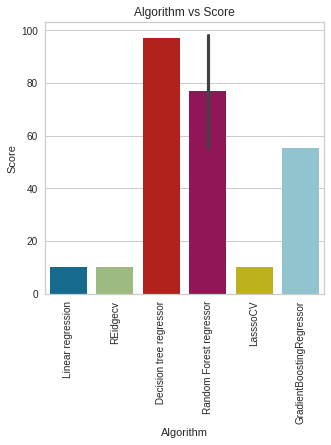

In [160]:
#visualization of best model
plt.figure(figsize=(5,5))
sns.barplot(x=algorithm,y=score)
plt.xticks(rotation=90)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm vs Score')

In [ ]:
dictionery=({'Actual':y_test, 'Predict':model6})
pd.DataFrame.from_dict(dictionery)

,Actual,Predict
0,4.1,3.629
1,1.0,1.000
2,1.5,1.500
3,1.6,1.600
4,2.6,2.600
...,...,...
10798,2.3,2.300
10799,1.5,1.500
10800,4.0,4.020
10801,3.8,3.800
